<a href="https://colab.research.google.com/github/plaban1981/Pytorch_lightning/blob/main/Huggingface_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pipelines

The  pipeline groups together three steps: 
* preprocessing, 
* passing the inputs through the model, and 
* postprocessing:

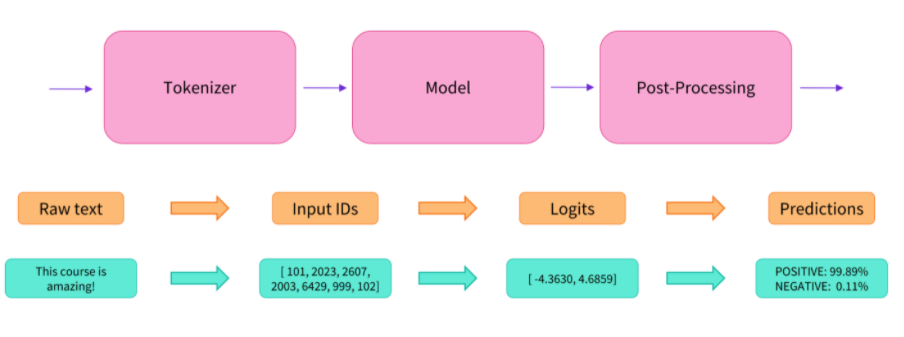

## Install Transformers

In [2]:
! pip install datasets transformers

     |████████████████████████████████| 266kB 9.8MB/s 
     |████████████████████████████████| 2.5MB 19.0MB/s 
     |████████████████████████████████| 122kB 51.2MB/s 
     |████████████████████████████████| 245kB 51.2MB/s 
     |████████████████████████████████| 901kB 49.2MB/s 
     |████████████████████████████████| 3.3MB 50.0MB/s 
ERROR: transformers 4.8.2 has requirement huggingface-hub==0.0.12, but you'll have huggingface-hub 0.0.13 which is incompatible.


In [2]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier(["I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",])

[{'label': 'POSITIVE', 'score': 0.9598048329353333},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

* Transformer models can’t process raw text directly, 
* so the first step of our pipeline is to convert the text inputs into numbers that the model can make sense of.

#### Purpose of Tokenizer

* Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
* Mapping each token to an integer
* Adding additional inputs that may be useful to the model

All this preprocessing needs to be done in exactly the same way as when the model was pretrained,in order to this do the folowing :-

* download that information from the Model Hub. 
* To do this, we use the AutoTokenizer class and its from_pretrained method. 
* Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache it (so it’s only downloaded the first time you run the code below).

#### classtransformers.AutoModel

* This is a generic model class that will be instantiated as one of the base model classes of the library when created with the **from_pretrained()** class method or the from_config() class method.

* Once we have the tokenizer, we can directly pass our sentences to it and we’ll get back a dictionary that’s ready to feed to our model

* Transformer models only accept tensors as input

In [6]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [7]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.", 
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


## input_ids -  are the unique identifiers of the tokens in each sentence

In [5]:
print(inputs['input_ids'])

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]])


* all zeros in the input ids for second sentence is coz of padding

##Attention Mask

In [6]:
print(inputs['attention_mask'])

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])


## Going through the model

**🤗 Transformers** provides an **AutoModel** class which also has a from_pretrained method in order to download  download our pretrained model

In [3]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing DistilBertModel: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
model.parameters

<bound method Module.parameters of DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bi

* This architecture contains only the base Transformer module
* Given some inputs, it outputs  hidden states, also known as features. 
* For each model input, we’ll retrieve a high-dimensional vector representing the **contextual understanding of that input** by the Transformer model.

The vector output by the Transformer module is usually large. It generally has three dimensions:

* Batch size: The number of sequences processed at a time (2 in our example).
* Sequence length: The length of the numerical representation of the sequence (16 in our example).
* Hidden size: The vector dimension of each model input.

The hidden size can be very large **(768 is common for smaller models, and in larger models this can reach 3072 or more)**.

In [10]:
print(len(raw_inputs ))#Batch size: The number of sequences processed at a time
print(len(inputs['input_ids'][0]))#sequence length

2
16


In [8]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])
